In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Could not save font_manager cache [Errno 13] Permission denied: 'C:\\Users\\91720\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


In [2]:
# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [3]:
# Convert labels: 'ham' -> 0, 'spam' -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [4]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    words = text.split()  # Tokenize
    return ' '.join(words)  # Return as a cleaned string

# Apply preprocessing
df['message'] = df['message'].apply(preprocess_text)


In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])


In [6]:
# Convert text data into numerical vectors (Bag of Words model)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [7]:
# Convert word counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [8]:
#Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [9]:
# Predictions
y_pred = classifier.predict(X_test_tfidf)

In [10]:
# Print all records with predictions
print("\n=== Spam Classification Results ===\n")
for email, actual, predicted in zip(X_test, y_test, y_pred):
    print(f"Email: \"{email}\"\nActual: {'Spam' if actual == 1 else 'Not Spam'}\nPredicted: {'Spam' if predicted == 1 else 'Not Spam'}\n")



=== Spam Classification Results ===

Email: "oh right ok i ll make sure that i do loads of work during the day got a really nasty cough today and is dry n shot so that should really help it"
Actual: Not Spam
Predicted: Not Spam

Email: "i am in tirupur call you da"
Actual: Not Spam
Predicted: Not Spam

Email: "no that just means you have a fat head"
Actual: Not Spam
Predicted: Not Spam

Email: "you have won cash or a prize to claim call"
Actual: Spam
Predicted: Spam

Email: "come aftr lt decimal gt now i m cleaning the house"
Actual: Not Spam
Predicted: Not Spam

Email: "friendship poem dear o dear u r not near but i can hear dont get fear live with cheer no more tear u r always my dear gud ni"
Actual: Not Spam
Predicted: Not Spam

Email: "wot about on wed nite i am then but only til"
Actual: Not Spam
Predicted: Not Spam

Email: "dont talk to him ever ok its my word"
Actual: Not Spam
Predicted: Not Spam

Email: "congrats kano whr s the treat maga"
Actual: Not Spam
Predicted: Not Spam


In [11]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9587

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.69      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



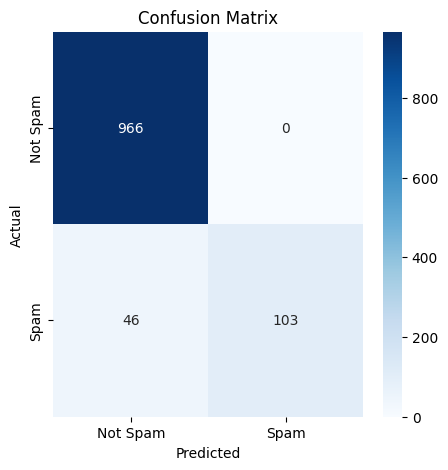

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()